Before you run this code you will need to download the 'vgg19_weights.h5' file and put it to the same folder with this file.
You can download it from here: http://files.heuritech.com/weights/vgg19_weights.h5

For example: !wget http://files.heuritech.com/weights/vgg19_weights.h5

Based on http://euler.stat.yale.edu/~tba3/stat665/lectures/lec18/notebook18.html and https://github.com/philipperemy/keras-visualize-activations


In [1]:
import scipy.io
import scipy.misc
import tensorflow as tf
import numpy as np
import time
#from IPython.display import Image

from PIL import Image

from keras import backend
backend.set_image_dim_ordering('th')

from keras.models import Sequential, Model
from keras.layers.core import Flatten, Dense, Dropout, Activation
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD

from keras.utils.vis_utils import plot_model

%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(3,224,224)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1000, activation='softmax'))

In [3]:
model.load_weights("./vgg19_weights.h5")

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_1 (ZeroPaddin (None, 3, 226, 226)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 224, 224)      1792      
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 64, 226, 226)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 224, 224)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 112, 112)      0         
_________________________________________________________________
zero_padding2d_3 (ZeroPaddin (None, 64, 114, 114)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 112, 112)     73856     
__________

In [5]:
plot_model(model, show_shapes=True, to_file='model.png')

In [6]:
img_model=Image.open('model.png')

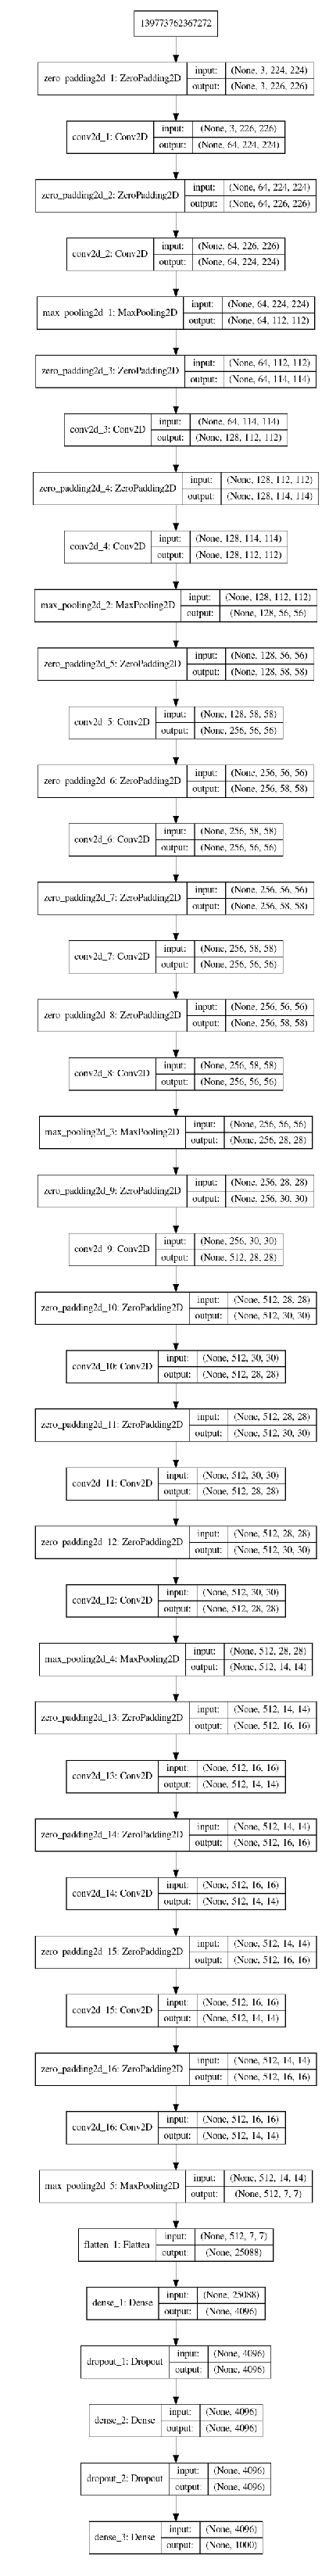

In [7]:
plt.figure(figsize=(30, 60))
plt.axis("off")
plt.imshow(img_model)
plt.show()

We have to compile the model, even though we have no intention of actually training it. This is because the compilation in part sets the forward propagation code, which we will need to do predictions.

In [9]:
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True) #nesterov's accelerated gradient
model.compile(optimizer=sgd, loss='categorical_crossentropy')

The 'synset_words.txt' file contains the names of the classes. We need to load it

In [10]:
synsets = []
with open("./synset_words.txt", "r") as f:
    synsets += f.readlines()
synsets = [x.replace("\n","") for x in synsets]

Let us create a list of images that we want to classify.

In [11]:
fileList=['img/elephant.jpg','img/bus.jpg']

img/elephant.jpg


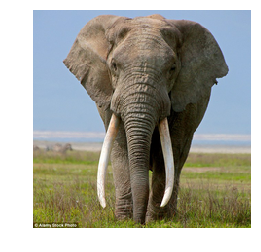

0.0079 - n07248320 book jacket, dust cover, dust jacket, dust wrapper
0.0057 - n02797295 barrow, garden cart, lawn cart, wheelbarrow
0.0047 - n02088094 Afghan hound, Afghan
0.0043 - n03141823 crutch
0.0042 - n02879718 bow
0.0039 - n04367480 swab, swob, mop
0.0038 - n02747177 ashcan, trash can, garbage can, wastebin, ash bin, ash-bin, ashbin, dustbin, trash barrel, trash bin
0.0038 - n04509417 unicycle, monocycle
0.0037 - n02105641 Old English sheepdog, bobtail
0.0037 - n03000684 chain saw, chainsaw
*********
img/bus.jpg


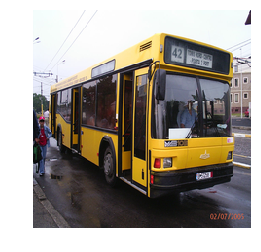

0.0069 - n02797295 barrow, garden cart, lawn cart, wheelbarrow
0.0060 - n02909870 bucket, pail
0.0053 - n04356056 sunglasses, dark glasses, shades
0.0052 - n04493381 tub, vat
0.0048 - n07615774 ice lolly, lolly, lollipop, popsicle
0.0047 - n02747177 ashcan, trash can, garbage can, wastebin, ash bin, ash-bin, ashbin, dustbin, trash barrel, trash bin
0.0046 - n04355933 sunglass
0.0044 - n03970156 plunger, plumber's helper
0.0043 - n03794056 mousetrap
0.0039 - n03124170 cowboy hat, ten-gallon hat
*********


In [12]:
for actfile in fileList:
    
    # We are going to classify this image:
    print(actfile)
    # Load it
    im=Image.open(actfile).resize((224, 224), Image.ANTIALIAS)
    
    # Plot it
    plt.figure(figsize=(4, 4))
    plt.axis("off")
    plt.imshow(im)
    plt.show()
    
    # Preporcess the image
    im = np.array(im).astype(np.float32)

    # scale the image, according to the format used in training
    im[:,:,0] -= 103.939
    im[:,:,1] -= 116.779
    im[:,:,2] -= 123.68
    im = im.transpose((2,0,1))
    im = np.expand_dims(im, axis=0)
    
    # Now we can do the prediction
    out = model.predict(im)
    
    # Print 10 class labels with the highest  probabilities
    for index in np.argsort(out)[0][::-1][:10]:
        print("%01.4f - %s" % (out[0][index], synsets[index].replace("\n","")))
        
    print('*********')
        

    

In [13]:
from read_activations import get_activations

In [14]:
activations = get_activations(model, im, print_shape_only=True) 

----- activations -----
(1, 3, 226, 226)
(1, 64, 224, 224)
(1, 64, 226, 226)
(1, 64, 224, 224)
(1, 64, 112, 112)
(1, 64, 114, 114)
(1, 128, 112, 112)
(1, 128, 114, 114)
(1, 128, 112, 112)
(1, 128, 56, 56)
(1, 128, 58, 58)
(1, 256, 56, 56)
(1, 256, 58, 58)
(1, 256, 56, 56)
(1, 256, 58, 58)
(1, 256, 56, 56)
(1, 256, 58, 58)
(1, 256, 56, 56)
(1, 256, 28, 28)
(1, 256, 30, 30)
(1, 512, 28, 28)
(1, 512, 30, 30)
(1, 512, 28, 28)
(1, 512, 30, 30)
(1, 512, 28, 28)
(1, 512, 30, 30)
(1, 512, 28, 28)
(1, 512, 14, 14)
(1, 512, 16, 16)
(1, 512, 14, 14)
(1, 512, 16, 16)
(1, 512, 14, 14)
(1, 512, 16, 16)
(1, 512, 14, 14)
(1, 512, 16, 16)
(1, 512, 14, 14)
(1, 512, 7, 7)
(1, 25088)
(1, 4096)
(1, 4096)
(1, 4096)
(1, 4096)
(1, 1000)


In [15]:
len(activations)

43

In [16]:
activations[0][0,0,:,:].shape

(226, 226)

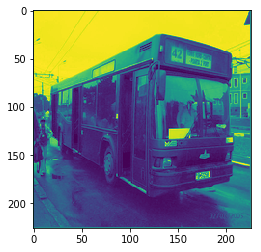

In [17]:
plt.imshow(activations[0][0,2,:,:])

In [18]:
activations[1].shape

(1, 64, 224, 224)

In [19]:
activations[1][0,1,:,:].shape

(224, 224)

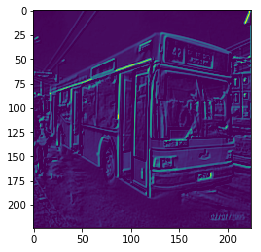

In [20]:
plt.imshow(activations[1][0,23,:,:])

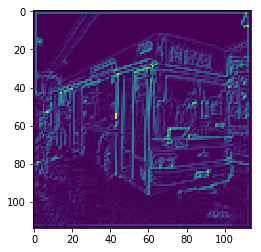

In [21]:
plt.imshow(activations[5][0,47,:,:])

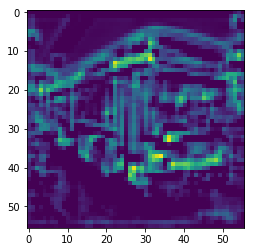

In [22]:
plt.imshow(activations[11][0,47,:,:])

(1, 512, 30, 30)
(30, 30)


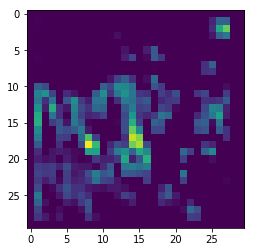

In [23]:
print(activations[23].shape)
print(activations[23][0,147,:,:].shape)
plt.imshow(activations[23][0,147,:,:])

(1, 512, 14, 14)
(14, 14)


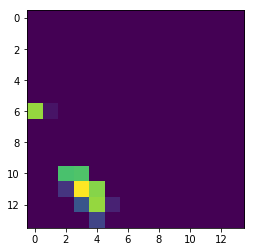

In [24]:
print(activations[35].shape)
print(activations[35][0,47,:,:].shape)
plt.imshow(activations[35][0,47,:,:])

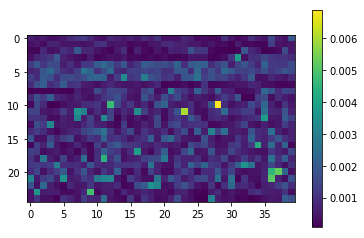

In [25]:
mtx=activations[42][0]
mtx.shape
mtx2=mtx.reshape(25,40)
fig=plt.imshow(mtx2)
plt.colorbar(fig)